In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('..')
os.getcwd()

'/home/yermaand/audio-nn'

In [3]:
from src import *

In [4]:
model, config = load_model_locally(f'020_RX100_resized_128/0', model_name='rvce')

In [5]:
files = [config.testing_files[0]]
datapool = DataPool(files, config)

Video loading:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
video = datapool[next(iter(datapool.keys()))]

from_time, till_time  = video.get_from_till_time(Part.WHOLE)

sr = config.sr
audio = video.signal
events = video.events

samples, labels = create_dataset_sequentially(video, from_time=from_time, till_time=till_time)

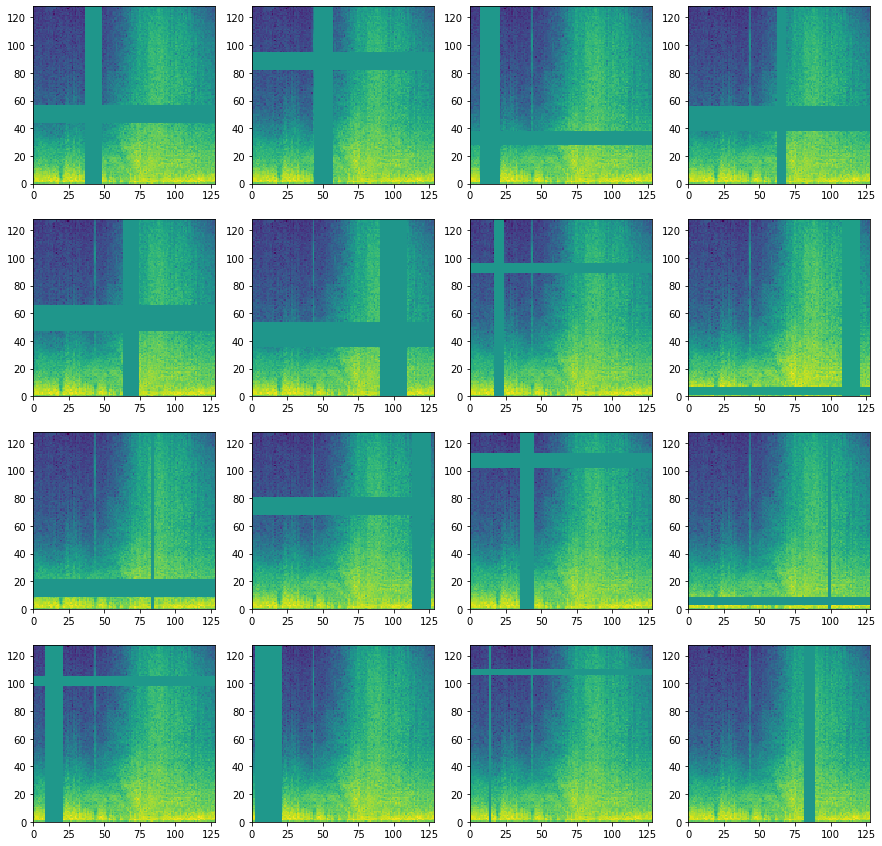

In [7]:
sample = samples[0]

config.feature_augmentation = True
config.time_mask_param = 20
config.freq_mask_param = 20
transform = create_transformation(config, True)

nrows = 4
ncols = 4
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 15))

for i in range(nrows):
    for j in range(ncols):
        features = transform(sample).squeeze()
        axes[i, j].pcolormesh(features)

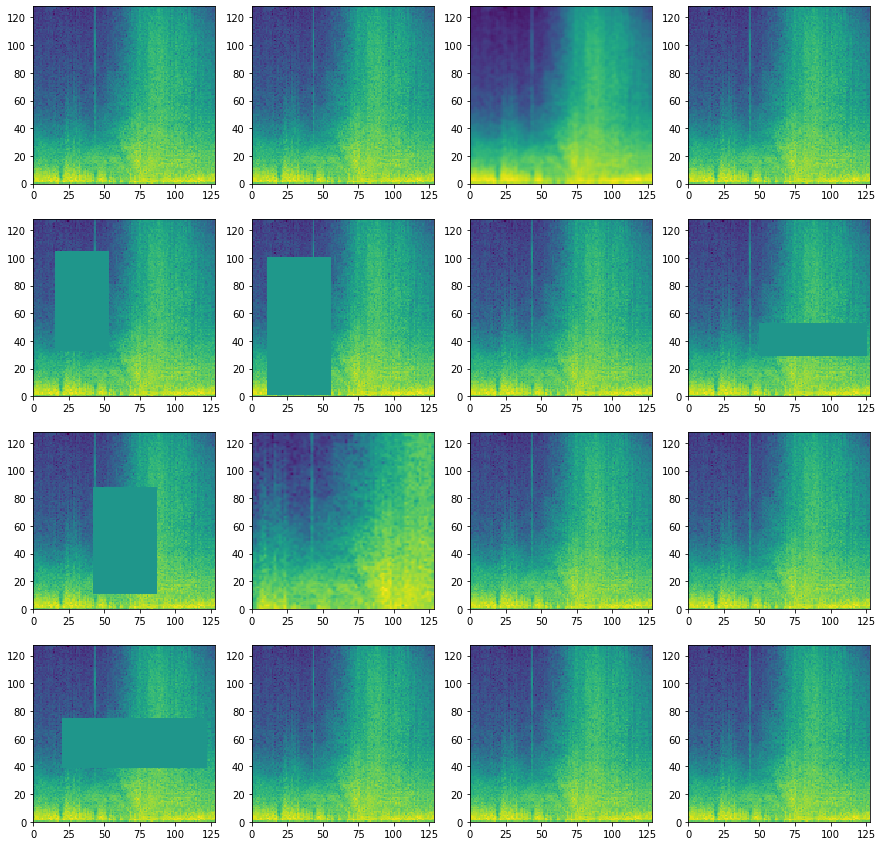

In [17]:
sample = samples[0]

config.feature_augmentation = False
config.image_augmentations = True
config.random_gaussian_blur = True
config.random_erasing = True
config.random_resized_crop = True
transform = create_transformation(config, True)

nrows = 4
ncols = 4
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 15))

reference_features = create_transformation(config, False)(sample).squeeze()

for i in range(nrows):
    for j in range(ncols):
        features = transform(sample).squeeze()
        axes[i, j].pcolormesh(features)

axes[0, 0].pcolormesh(reference_features);

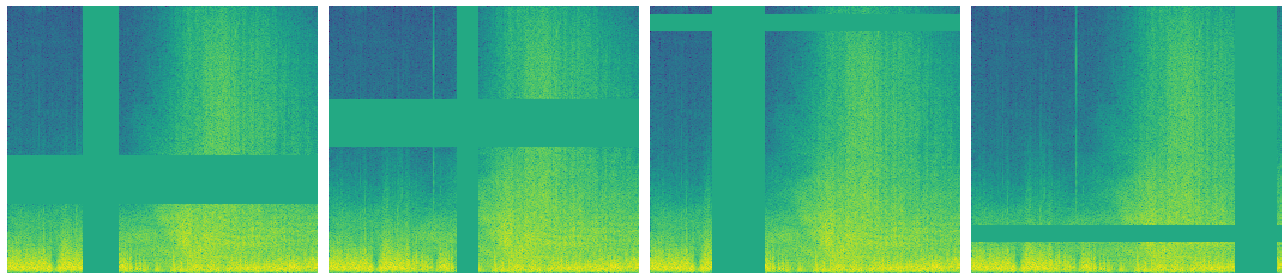

In [21]:
sample = samples[0]

config.feature_augmentation = True
config.time_mask_param = 50
config.freq_mask_param = 100
transform = create_transformation(config, True)

nrows = 1
ncols = 4
fig, ax = plt.subplots(nrows, ncols, figsize=(18, 4))

for i in range(ncols):
    features = transform(sample).squeeze()
    ax[i].axis('off')
    ax[i].pcolormesh(features)

plt.tight_layout()
plt.savefig('plots/feature_masking.png')

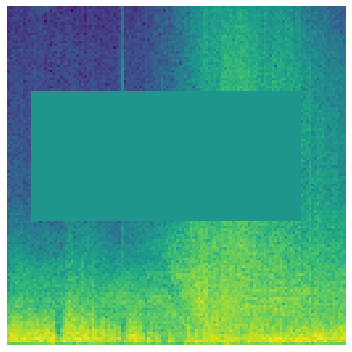

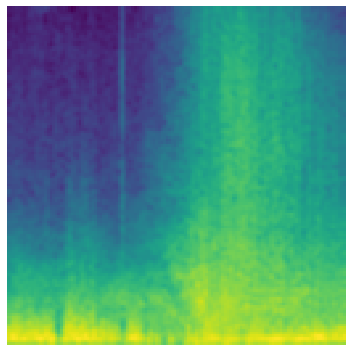

In [17]:
sample = samples[0]

def save_features_plot(features, name):
    plt.subplots(figsize=(5, 5))
    plt.axis('off')
    plt.pcolormesh(features)
    plt.tight_layout()
    plt.savefig(name, bbox_inches='tight', pad_inches=0)

config.feature_augmentation = True

config.time_mask_param = 20
config.freq_mask_param = 20
transform = create_transformation(config, True)
features = transform(sample).squeeze()
# save_features_plot(features, 'plots/feature_masking.pdf')

config.feature_augmentation = False
config.image_augmentations = True

config.random_erasing = True
transform = create_transformation(config, True)
features = transform(sample).squeeze()
# save_features_plot(features, 'plots/random_erasing.pdf')
config.random_erasing = False

config.random_gaussian_blur = True
transform = create_transformation(config, True)
features = transform(sample).squeeze()
# save_features_plot(features, 'plots/random_gaussian_blur.pdf')
config.random_gaussian_blur = False

config.random_resized_crop = True
transform = create_transformation(config, True)
features = transform(sample).squeeze()
# save_features_plot(features, 'plots/random_resized_crop.pdf')
config.random_resized_crop = False

In [6]:
import torchvision.transforms as T
import albumentations as A
import torch

In [75]:
# self.transform(image=sample)['image']

tf = A.Compose([
    A.OneOf([
        A.MotionBlur(5),
        A.MedianBlur(5),
        A.Blur(5),
    ]),
])


tf = T.RandomChoice([
    lambda x: x,
    T.GaussianBlur(3),
    T.GaussianBlur(5),
    T.GaussianBlur(7)
])

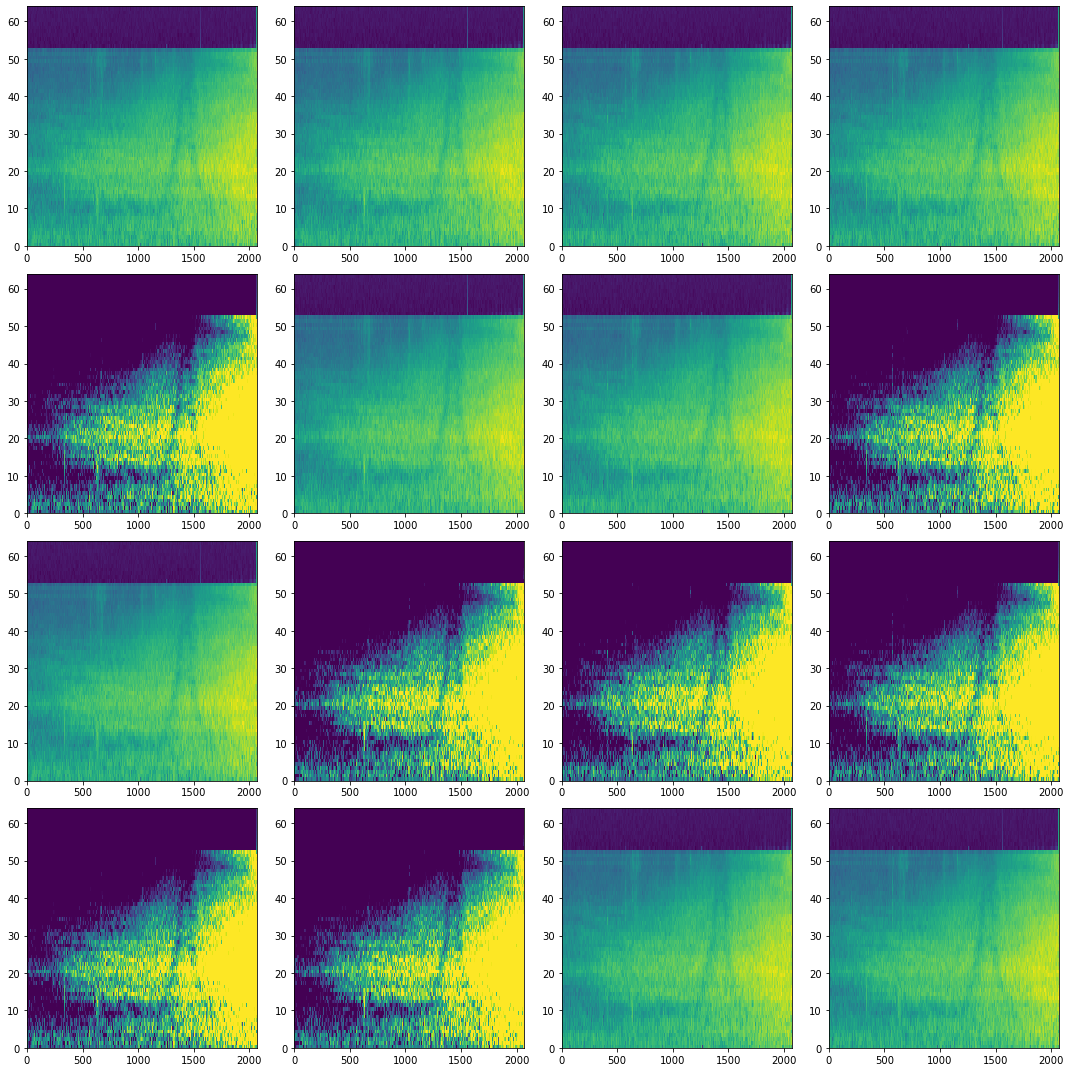

In [76]:
sample = samples[0]

config.feature_augmentation = False
transform = create_transformation(config, True)

nrows = ncols = 4
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 15))

# tf = T.TrivialAugmentWide()
# tf = T.ColorJitter((,1))

features_initial = transform(sample).squeeze()

for i in range(nrows):
    for j in range(ncols):
        # features = transform(sample).squeeze().numpy()
        features = transform(sample)
        features = tf(features).squeeze()
        # features = tf(image=features)['image'].squeeze()
        # print((features_initial - features).abs().mean())
        axes[i, j].pcolormesh(features)

axes[0, 0].pcolormesh(features_initial)
plt.tight_layout()